In [4]:
import pandas as pd

In [5]:
house_prices = pd.read_csv('train.csv')

In [6]:
house_prices = house_prices.rename(columns=str.lower)

In [7]:
house_prices.shape

(1460, 81)

In [8]:
house_prices = house_prices.drop('id', axis=1)
house_prices.shape

(1460, 80)

# Visual

In [9]:
house_prices.groupby(pd.cut(house_prices.saleprice, 20)).size().plot.bar()

In [10]:
na = house_prices.isna().mean().sort_values(ascending=False)

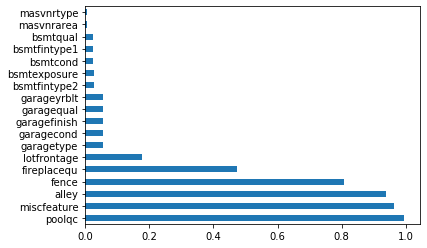

In [11]:
na.sort_values(ascending=False).head(18).plot(kind='barh');

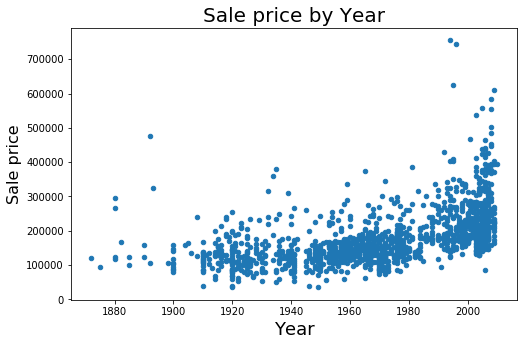

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot(111)

house_prices.plot.scatter(x='yearbuilt', y='saleprice', ax=ax)

plt.title('Sale price by Year', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Sale price', fontsize=16);

# Drop some NAs

In [13]:
nas_means = house_prices.isna().mean()
columns_nas = nas_means[nas_means> 0.3].index
house_prices = house_prices.drop(columns_nas, axis=1)
house_prices.shape

(1460, 75)

# Drop numerical features which mostly have a single value

In [14]:
house_prices.describe()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
percentiles = [i/20 for i in range(1, 20)]
description = house_prices.describe(percentiles=percentiles).T
numerical_with_mainly_one_value = description[description['5%'] == description['95%']]
numerical_with_mainly_one_value

,count,mean,std,min,5%,10%,15%,20%,25%,30%,...,55%,60%,65%,70%,75%,80%,85%,90%,95%,max
lowqualfinsf,1460.0,5.844521,48.623081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,572.0
kitchenabvgr,1460.0,1.046575,0.220338,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
3ssnporch,1460.0,3.409589,29.317331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,508.0
poolarea,1460.0,2.758904,40.177307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,738.0
miscval,1460.0,43.489041,496.123024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15500.0


In [16]:
house_prices = house_prices.drop(numerical_with_mainly_one_value.index, axis=1)
house_prices.shape

(1460, 70)

In [17]:
house_prices

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,...,paveddrive,wooddecksf,openporchsf,enclosedporch,screenporch,mosold,yrsold,saletype,salecondition,saleprice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,61,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Y,298,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,0,42,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,0,35,272,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Y,192,84,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,40,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,349,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,60,0,0,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,366,0,112,0,4,2010,WD,Normal,142125


# Drop categorical features which mainly have 1 feature (>90%)

In [18]:
columns_with_mainly_one_values = []
categorical_columns = house_prices.select_dtypes('object').columns
for column in categorical_columns:
    value_counts = house_prices[column].value_counts(normalize=True).cumsum()
    if value_counts[0]>0.9:
        columns_with_mainly_one_values.append(column)
columns_with_mainly_one_values

house_prices = house_prices.drop(columns_with_mainly_one_values, axis=1)
house_prices.shape, pd.get_dummies(house_prices).shape

((1460, 57), (1460, 206))

# Merge long tail categories to other (>%90)

In [19]:
categorical_columns = house_prices.select_dtypes('object').columns
for column in categorical_columns:
    value_counts = house_prices[column].value_counts(normalize=True).cumsum()
    long_tail = value_counts[value_counts>0.9].index
    house_prices[column] = house_prices[column].replace(to_replace=long_tail, value='Other')
house_prices.shape, pd.get_dummies(house_prices).shape

((1460, 57), (1460, 114))

In [20]:
long_tail

Index(['Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'], dtype='object')

## Check correlations to price

In [21]:
correlation_to_price = house_prices.corr()['saleprice'].sort_values()
correlation_to_price

enclosedporch   -0.128578
mssubclass      -0.084284
overallcond     -0.077856
yrsold          -0.028923
bsmthalfbath    -0.016844
bsmtfinsf2      -0.011378
mosold           0.046432
screenporch      0.111447
bedroomabvgr     0.168213
bsmtunfsf        0.214479
bsmtfullbath     0.227122
lotarea          0.263843
halfbath         0.284108
openporchsf      0.315856
2ndflrsf         0.319334
wooddecksf       0.324413
lotfrontage      0.351799
bsmtfinsf1       0.386420
fireplaces       0.466929
masvnrarea       0.477493
garageyrblt      0.486362
yearremodadd     0.507101
yearbuilt        0.522897
totrmsabvgrd     0.533723
fullbath         0.560664
1stflrsf         0.605852
totalbsmtsf      0.613581
garagearea       0.623431
garagecars       0.640409
grlivarea        0.708624
overallqual      0.790982
saleprice        1.000000
Name: saleprice, dtype: float64

In [22]:
small_correlation = correlation_to_price[correlation_to_price.abs()<0.1].index


In [23]:
house_prices = house_prices.drop(small_correlation, axis=1)
house_prices.shape, pd.get_dummies(house_prices).shape

((1460, 51), (1460, 108))

# Fill missing values

In [24]:
house_prices.lotfrontage = house_prices.lotfrontage.fillna(house_prices.lotfrontage.median())
house_prices.garageyrblt = house_prices.garageyrblt.fillna(house_prices.garageyrblt.median())
house_prices.masvnrarea = house_prices.masvnrarea.fillna(house_prices.masvnrarea.median())

In [25]:
categorical_columns = house_prices.select_dtypes('object').columns
categorical_columns

Index(['mszoning', 'lotshape', 'landcontour', 'lotconfig', 'neighborhood',
       'condition1', 'bldgtype', 'housestyle', 'roofstyle', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heatingqc',
       'kitchenqual', 'garagetype', 'garagefinish', 'saletype',
       'salecondition'],
      dtype='object')

In [26]:
house_prices.isna().mean().sort_values(ascending=False)

garagefinish     0.055479
garagetype       0.055479
bsmtfintype2     0.026027
bsmtexposure     0.026027
bsmtqual         0.025342
bsmtfintype1     0.025342
masvnrtype       0.005479
lotshape         0.000000
roofstyle        0.000000
foundation       0.000000
extercond        0.000000
exterqual        0.000000
masvnrarea       0.000000
exterior2nd      0.000000
exterior1st      0.000000
yearremodadd     0.000000
landcontour      0.000000
yearbuilt        0.000000
housestyle       0.000000
lotfrontage      0.000000
bldgtype         0.000000
lotarea          0.000000
condition1       0.000000
neighborhood     0.000000
lotconfig        0.000000
overallqual      0.000000
saleprice        0.000000
bsmtfinsf1       0.000000
salecondition    0.000000
saletype         0.000000
screenporch      0.000000
enclosedporch    0.000000
openporchsf      0.000000
wooddecksf       0.000000
garagearea       0.000000
garagecars       0.000000
garageyrblt      0.000000
fireplaces       0.000000
totrmsabvgrd

In [27]:
house_prices = house_prices.fillna(house_prices.mode().iloc[0])

In [28]:
house_prices.isna().mean().sort_values(ascending=False)

saleprice        0.0
yearremodadd     0.0
bsmtexposure     0.0
bsmtqual         0.0
foundation       0.0
extercond        0.0
exterqual        0.0
masvnrarea       0.0
masvnrtype       0.0
exterior2nd      0.0
exterior1st      0.0
roofstyle        0.0
yearbuilt        0.0
bsmtfinsf1       0.0
overallqual      0.0
housestyle       0.0
bldgtype         0.0
condition1       0.0
neighborhood     0.0
lotconfig        0.0
landcontour      0.0
lotshape         0.0
lotarea          0.0
lotfrontage      0.0
bsmtfintype1     0.0
bsmtfintype2     0.0
salecondition    0.0
fireplaces       0.0
saletype         0.0
screenporch      0.0
enclosedporch    0.0
openporchsf      0.0
wooddecksf       0.0
garagearea       0.0
garagecars       0.0
garagefinish     0.0
garageyrblt      0.0
garagetype       0.0
totrmsabvgrd     0.0
bsmtunfsf        0.0
kitchenqual      0.0
bedroomabvgr     0.0
halfbath         0.0
fullbath         0.0
bsmtfullbath     0.0
grlivarea        0.0
2ndflrsf         0.0
1stflrsf     

In [29]:
house_prices = pd.get_dummies(house_prices)

In [30]:
house_prices.dtypes

lotfrontage             float64
lotarea                   int64
overallqual               int64
yearbuilt                 int64
yearremodadd              int64
                         ...   
garagefinish_Unf          uint8
saletype_Other            uint8
saletype_WD               uint8
salecondition_Normal      uint8
salecondition_Other       uint8
Length: 108, dtype: object

In [31]:
house_prices = house_prices.astype(float)

In [32]:
house_prices.dtypes

lotfrontage             float64
lotarea                 float64
overallqual             float64
yearbuilt               float64
yearremodadd            float64
                         ...   
garagefinish_Unf        float64
saletype_Other          float64
saletype_WD             float64
salecondition_Normal    float64
salecondition_Other     float64
Length: 108, dtype: object

# Algorithms 

In [33]:
house_prices.saleprice.mean()

180921.19589041095

In [34]:
from sklearn.model_selection import train_test_split
x, y = house_prices.drop('saleprice', axis=1), house_prices.saleprice
train_test_ratio = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=train_test_ratio, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 107), (1168,), (292, 107), (292,))

In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(y_true, y_pred):

    return mean_squared_error(y_true, y_pred)**0.5
models_errors = {}

average_train = y_train.mean()
y_pred = np.ones_like(y_test) * average_train
model_mse = root_mean_squared_error(y_test, y_pred)
models_errors['Benchmark'] = model_mse
model_mse

83103.3406605733

In [36]:
def check_regressor(regressor, x_train, y_train, x_test, y_test):
    # Fit regression model
    regressor.fit(x_train, y_train)

    # Predict
    y_pred = regressor.predict(x_test)
    mse = root_mean_squared_error(y_test, y_pred)
    y_pred_train = regressor.predict(x_train)
    mse_train = root_mean_squared_error(y_train, y_pred_train)
    
    model_name = regressor.__class__.__name__
    print('{0} root mean squared error is {1:.4f} (mse train {2:.4f})'
          .format(model_name, mse, mse_train))
    return mse

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
model_mse = check_regressor(linear_regressor, x_train, y_train, x_test, y_test)
model_name = linear_regressor.__class__.__name__
models_errors[model_name] = model_mse

LinearRegression root mean squared error is 43602.3173 (mse train 26396.7847)


In [37]:
from sklearn.neighbors import KNeighborsRegressor

k = 15
nearest_neighbors = KNeighborsRegressor(k)
model_mse = check_regressor(nearest_neighbors, x_train, y_train, x_test, y_test)
model_name = nearest_neighbors.__class__.__name__
models_errors[model_name] = model_mse

KNeighborsRegressor root mean squared error is 52949.4982 (mse train 43860.0886)


In [38]:
from sklearn.neighbors import KNeighborsRegressor

k = 7
nearest_neighbors = KNeighborsRegressor(k)
model_mse = check_regressor(nearest_neighbors, x_train, y_train, x_test, y_test)
model_name = nearest_neighbors.__class__.__name__
models_errors[model_name] = model_mse

KNeighborsRegressor root mean squared error is 50717.5685 (mse train 38734.3094)


In [39]:
from sklearn.neighbors import KNeighborsRegressor

k = 3
nearest_neighbors = KNeighborsRegressor(k)
model_mse = check_regressor(nearest_neighbors, x_train, y_train, x_test, y_test)
model_name = nearest_neighbors.__class__.__name__
models_errors[model_name] = model_mse

KNeighborsRegressor root mean squared error is 50640.2945 (mse train 32497.4876)


# Scaled

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

k = 15
nearest_neighbors = KNeighborsRegressor(k)
model_mse = check_regressor(nearest_neighbors, x_train_scaled, y_train, x_test_scaled, y_test)
model_name = nearest_neighbors.__class__.__name__
models_errors[model_name] = model_mse

KNeighborsRegressor root mean squared error is 44750.7467 (mse train 35830.9697)


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

k = 3
nearest_neighbors = KNeighborsRegressor(k)
model_mse = check_regressor(nearest_neighbors, x_train_scaled, y_train, x_test_scaled, y_test)
model_name = nearest_neighbors.__class__.__name__
models_errors[model_name] = model_mse

KNeighborsRegressor root mean squared error is 44453.4634 (mse train 26155.5305)


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

k = 7
nearest_neighbors = KNeighborsRegressor(k)
model_mse = check_regressor(nearest_neighbors, x_train_scaled, y_train, x_test_scaled, y_test)
model_name = nearest_neighbors.__class__.__name__
models_errors[model_name] = model_mse

KNeighborsRegressor root mean squared error is 44035.6119 (mse train 32074.8456)


# Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 3
decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
model_mse = check_regressor(decision_tree, x_train, y_train, x_test, y_test)
model_name = decision_tree.__class__.__name__
models_errors[model_name] = model_mse

DecisionTreeRegressor root mean squared error is 49396.4389 (mse train 39691.8846)


In [44]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 5
decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
model_mse = check_regressor(decision_tree, x_train, y_train, x_test, y_test)
model_name = decision_tree.__class__.__name__
models_errors[model_name] = model_mse

DecisionTreeRegressor root mean squared error is 41676.3941 (mse train 29058.7724)


In [45]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 8
decision_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
model_mse = check_regressor(decision_tree, x_train, y_train, x_test, y_test)
model_name = decision_tree.__class__.__name__
models_errors[model_name] = model_mse

DecisionTreeRegressor root mean squared error is 40315.0819 (mse train 14051.1690)


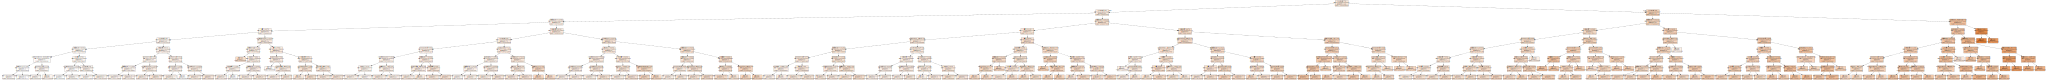

In [46]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
graph = Source(export_graphviz(decision_tree, feature_names= house_prices.columns[1:], filled = True))
display(SVG(graph.pipe(format='svg')))
    

In [47]:
from sklearn.tree import export_graphviz

In [50]:
export_graphviz(decision_tree, feature_names=x_test.columns, class_names= ['not error',  'error'], out_file='tree.dot', rounded = True, proportion = False, precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [45]:
#pip install pydotplus

In [46]:
#pip install graphviz

In [47]:
#conda install python-graphviz

In [48]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import datasets
#from IPython.display import Image  
#from sklearn import tree
#import pydotplus

#dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                #                feature_names=house_prices.columns[1:])

# Draw graph
#graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
#Image(graph.create_png())

In [49]:
# Create PNG
#graph.write_png("graph.png")

# Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 100
max_depth = 3
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
model_mse = check_regressor(random_forest, x_train, y_train, x_test, y_test)
model_name = random_forest.__class__.__name__
models_errors[model_name] = model_mse

RandomForestRegressor root mean squared error is 42035.4502 (mse train 34783.0199)


In [51]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 100
max_depth = 5
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
model_mse = check_regressor(random_forest, x_train, y_train, x_test, y_test)
model_name = random_forest.__class__.__name__
models_errors[model_name] = model_mse

RandomForestRegressor root mean squared error is 35200.7354 (mse train 23446.5906)


In [52]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 100
max_depth = 8
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
model_mse = check_regressor(random_forest, x_train, y_train, x_test, y_test)
model_name = random_forest.__class__.__name__
models_errors[model_name] = model_mse

RandomForestRegressor root mean squared error is 33119.4113 (mse train 14449.0044)


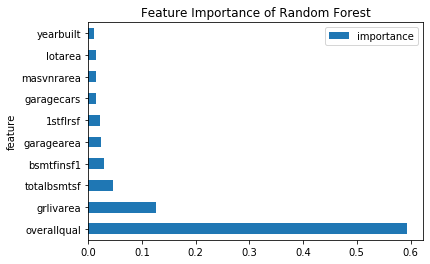

In [53]:
import matplotlib.pyplot as plt
feature_importances = random_forest.feature_importances_
features = x_train.columns
stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
top_10 = stats.sort_values('importance', ascending=False).head(10)
top_10.plot(y='importance', x='feature', kind='barh')
plt.title('Feature Importance of Random Forest');

# Lasso

In [54]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
tradeoff_parameter = 0.5
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lasso = Lasso(alpha=tradeoff_parameter)
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)
print('Lasso solution: b = {0:.2f}, w={1}'.format(lasso.intercept_, lasso.coef_.round(2)))
print('root_mean_squared_error = {0:.4f}'.format(root_mean_squared_error(y_test, y_pred)))

Lasso solution: b = 180808.90, w=[ 1537.73  5751.98 17433.81  6972.94  4620.94  5272.14  3740.26 -3602.21
  8431.91  5491.97  9586.9  12668.35   992.71  2604.88  1711.64 -3338.19
  4544.32  2183.83  1726.85  2834.92  2513.35  2182.26   966.36   119.31
  1383.53 -2432.44     0.    1411.63    -0.    1603.81    -0.    -239.55
     0.    2382.35 -1448.81  4751.09 -3333.51 -1650.75  -736.15 -3112.69
 -2417.92 -1389.24  5688.6   5493.88 -1092.18  2385.72 -1626.83  -748.3
  2594.94 -1742.27  3777.52    -0.    6889.25    -0.    3985.49 -1743.86
   916.69 -1791.96     0.    1947.4   1945.94  3580.01  1630.92   275.27
 -4269.42 -2168.22 -1573.85 -2122.89 -2257.26   119.27  3149.82  3993.71
    -0.    1387.34    -0.     935.84    -0.    1020.77  -547.21    -0.
 -5216.65  5385.59  -857.16     0.   -2517.43  1775.99   177.73     0.
  2038.99 -1363.22  -291.69  -464.7      0.    1253.56  -138.55    -0.
  1725.73    -0.     188.35    -0.     120.4  -1625.23    51.31  3306.54
    -0.    1057.67    -0.

C:\Users\ohad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48294485054.81622, tolerance: 719132949.923008
  positive)


In [55]:
from sklearn.linear_model import Lasso
tradeoff_parameter = 0.5
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lasso = Lasso(alpha=tradeoff_parameter)
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_train_scaled)
print('Lasso solution: b = {0:.2f}, w={1}'.format(lasso.intercept_, lasso.coef_.round(2)))
print('root_mean_squared_error = {0:.4f}'.format(root_mean_squared_error(y_train, y_pred)))

Lasso solution: b = 180808.90, w=[ 1537.73  5751.98 17433.81  6972.94  4620.94  5272.14  3740.26 -3602.21
  8431.91  5491.97  9586.9  12668.35   992.71  2604.88  1711.64 -3338.19
  4544.32  2183.83  1726.85  2834.92  2513.35  2182.26   966.36   119.31
  1383.53 -2432.44     0.    1411.63    -0.    1603.81    -0.    -239.55
     0.    2382.35 -1448.81  4751.09 -3333.51 -1650.75  -736.15 -3112.69
 -2417.92 -1389.24  5688.6   5493.88 -1092.18  2385.72 -1626.83  -748.3
  2594.94 -1742.27  3777.52    -0.    6889.25    -0.    3985.49 -1743.86
   916.69 -1791.96     0.    1947.4   1945.94  3580.01  1630.92   275.27
 -4269.42 -2168.22 -1573.85 -2122.89 -2257.26   119.27  3149.82  3993.71
    -0.    1387.34    -0.     935.84    -0.    1020.77  -547.21    -0.
 -5216.65  5385.59  -857.16     0.   -2517.43  1775.99   177.73     0.
  2038.99 -1363.22  -291.69  -464.7      0.    1253.56  -138.55    -0.
  1725.73    -0.     188.35    -0.     120.4  -1625.23    51.31  3306.54
    -0.    1057.67    -0.

C:\Users\ohad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48294485054.81622, tolerance: 719132949.923008
  positive)


In [56]:
from sklearn.linear_model import Lasso
tradeoff_parameter = 0.3
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lasso = Lasso(alpha=tradeoff_parameter)
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)
print('Lasso solution: b = {0:.2f}, w={1}'.format(lasso.intercept_, lasso.coef_.round(2)))
print('root_mean_squared_error = {0:.4f}'.format(root_mean_squared_error(y_test, y_pred)))

C:\Users\ohad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49081150472.394165, tolerance: 719132949.923008
  positive)


Lasso solution: b = 180808.90, w=[ 1.537860e+03  5.752220e+03  1.743335e+04  6.973580e+03  4.620850e+03
  5.272480e+03  3.734560e+03 -3.608270e+03  8.437170e+03  5.501380e+03
  9.599960e+03  1.265480e+04  9.926300e+02  2.605130e+03  1.711630e+03
 -3.338620e+03  4.545250e+03  2.183630e+03  1.727480e+03  2.835180e+03
  2.513090e+03  2.182390e+03  9.665300e+02  1.199600e+02  1.383640e+03
 -2.432600e+03  0.000000e+00  1.411690e+03 -0.000000e+00  1.604220e+03
 -0.000000e+00 -2.396100e+02  0.000000e+00  2.278870e+03 -1.609000e+03
  4.654390e+03 -3.468970e+03 -1.772670e+03 -8.193100e+02 -3.212770e+03
 -2.609910e+03 -1.503800e+03  5.600060e+03  5.375200e+03 -1.234100e+03
  2.222500e+03 -1.750030e+03 -8.526300e+02  2.470110e+03 -1.832480e+03
  3.777710e+03 -0.000000e+00  6.889480e+03 -0.000000e+00  4.126340e+03
 -1.615710e+03  1.028060e+03 -1.792130e+03  0.000000e+00  2.204440e+03
  2.200820e+03  3.823370e+03  1.828620e+03  6.176300e+02 -4.012460e+03
 -2.256550e+03 -1.664610e+03 -2.209160e+03 -

In [57]:
from sklearn.linear_model import Lasso
tradeoff_parameter = 0.3
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lasso = Lasso(alpha=tradeoff_parameter)
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_train_scaled)
print('Lasso solution: b = {0:.2f}, w={1}'.format(lasso.intercept_, lasso.coef_.round(2)))
print('root_mean_squared_error = {0:.4f}'.format(root_mean_squared_error(y_train, y_pred)))

C:\Users\ohad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49081150472.394165, tolerance: 719132949.923008
  positive)


Lasso solution: b = 180808.90, w=[ 1.537860e+03  5.752220e+03  1.743335e+04  6.973580e+03  4.620850e+03
  5.272480e+03  3.734560e+03 -3.608270e+03  8.437170e+03  5.501380e+03
  9.599960e+03  1.265480e+04  9.926300e+02  2.605130e+03  1.711630e+03
 -3.338620e+03  4.545250e+03  2.183630e+03  1.727480e+03  2.835180e+03
  2.513090e+03  2.182390e+03  9.665300e+02  1.199600e+02  1.383640e+03
 -2.432600e+03  0.000000e+00  1.411690e+03 -0.000000e+00  1.604220e+03
 -0.000000e+00 -2.396100e+02  0.000000e+00  2.278870e+03 -1.609000e+03
  4.654390e+03 -3.468970e+03 -1.772670e+03 -8.193100e+02 -3.212770e+03
 -2.609910e+03 -1.503800e+03  5.600060e+03  5.375200e+03 -1.234100e+03
  2.222500e+03 -1.750030e+03 -8.526300e+02  2.470110e+03 -1.832480e+03
  3.777710e+03 -0.000000e+00  6.889480e+03 -0.000000e+00  4.126340e+03
 -1.615710e+03  1.028060e+03 -1.792130e+03  0.000000e+00  2.204440e+03
  2.200820e+03  3.823370e+03  1.828620e+03  6.176300e+02 -4.012460e+03
 -2.256550e+03 -1.664610e+03 -2.209160e+03 -

In [58]:
from sklearn.linear_model import Lasso
tradeoff_parameter = 0.8
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lasso = Lasso(alpha=tradeoff_parameter)
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)
print('Lasso solution: b = {0:.2f}, w={1}'.format(lasso.intercept_, lasso.coef_.round(2)))
print('root_mean_squared_error = {0:.4f}'.format(root_mean_squared_error(y_test, y_pred)))

C:\Users\ohad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48313771145.63745, tolerance: 719132949.923008
  positive)


Lasso solution: b = 180808.90, w=[ 1537.95  5751.62 17435.32  6971.68  4621.09  5271.73  3749.03 -3592.67
  8423.68  5477.24  9566.28 12688.87   992.78  2604.63  1712.79 -3337.26
  4542.71  2184.54  1726.02  2834.28  2514.31  2182.46   966.19   118.55
  1383.32 -2431.95     0.    1411.33    -0.    1603.15    -0.    -239.73
     0.    2537.7  -1208.55  4896.25 -3129.8  -1467.53  -611.64 -2962.04
 -2129.82 -1217.47  5821.45  5670.97  -879.41  2630.78 -1442.03  -591.42
  2782.07 -1607.15  3777.11    -0.    6889.09    -0.    3774.56 -1935.87
   749.45 -1791.81     0.    1667.02  1660.68  3320.24  1417.5    -64.32
 -4543.38 -2024.24 -1419.42 -1987.41 -2131.14   280.46  3288.83  3992.69
    -0.    1387.12    -0.     935.79    -0.    1019.39  -547.28    -0.
 -4870.32  5600.64  -506.14     0.   -2518.21  1775.47   178.29     0.
  2040.02 -1362.3   -290.59  -462.08     0.    1252.98  -138.69    -0.
  1725.35    -0.     188.36    -0.      74.74 -1672.28     0.    3306.55
    -0.    1057.36    -0

In [82]:
from sklearn.linear_model import Lasso
tradeoff_parameter = 0.8
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
lasso = Lasso(alpha=tradeoff_parameter)
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_train_scaled)
print('Lasso solution: b = {0:.2f}, w={1}'.format(lasso.intercept_, lasso.coef_.round(2)))
print('root_mean_squared_error = {0:.4f}'.format(root_mean_squared_error(y_train, y_pred)))

Lasso solution: b = 180808.90, w=[ 1537.95  5751.62 17435.32  6971.68  4621.09  5271.73  3749.03 -3592.67
  8423.68  5477.24  9566.28 12688.87   992.78  2604.63  1712.79 -3337.26
  4542.71  2184.54  1726.02  2834.28  2514.31  2182.46   966.19   118.55
  1383.32 -2431.95     0.    1411.33    -0.    1603.15    -0.    -239.73
     0.    2537.7  -1208.55  4896.25 -3129.8  -1467.53  -611.64 -2962.04
 -2129.82 -1217.47  5821.45  5670.97  -879.41  2630.78 -1442.03  -591.42
  2782.07 -1607.15  3777.11    -0.    6889.09    -0.    3774.56 -1935.87
   749.45 -1791.81     0.    1667.02  1660.68  3320.24  1417.5    -64.32
 -4543.38 -2024.24 -1419.42 -1987.41 -2131.14   280.46  3288.83  3992.69
    -0.    1387.12    -0.     935.79    -0.    1019.39  -547.28    -0.
 -4870.32  5600.64  -506.14     0.   -2518.21  1775.47   178.29     0.
  2040.02 -1362.3   -290.59  -462.08     0.    1252.98  -138.69    -0.
  1725.35    -0.     188.36    -0.      74.74 -1672.28     0.    3306.55
    -0.    1057.36    -0

C:\Users\ohad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48313771145.63745, tolerance: 719132949.923008
  positive)


In [83]:
import pandas as pd
pd.Series(models_errors, name='root mean squared error').sort_values().to_frame()

,root mean squared error
RandomForestRegressor,32982.152152
DecisionTreeRegressor,40315.081893
LinearRegression,43602.317256
KNeighborsRegressor,44035.611868
Benchmark,83103.340661


In [84]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
parameters = {'n_estimators':[100, 150, 200, 250, 300, 350, 400], 'max_depth':[3, 5, 7, 9, 11]}
model = GridSearchCV(rf, parameters, cv=3, scoring='neg_mean_squared_error')

model.fit(x_train, y_train)

C:\Users\ohad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=8, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 150, 20

In [85]:
model.cv_results_

{'mean_fit_time': array([6.50679906e-01, 9.35128927e-01, 1.28500589e+00, 1.65413094e+00,
        1.84716614e+00, 2.27514982e+00, 2.59395838e+00, 1.03614028e+00,
        1.55568878e+00, 2.06871335e+00, 2.57908821e+00, 3.08101018e+00,
        3.65700897e+00, 4.20859321e+00, 1.46448525e+00, 2.24788022e+00,
        2.90313522e+00, 3.62944492e+00, 4.38165307e+00, 5.09720039e+00,
        5.87705946e+00, 1.81751092e+00, 2.79902458e+00, 3.71125229e+00,
        4.68683521e+00, 5.60716065e+00, 6.51999275e+00, 7.44746431e+00,
        2.20341579e+00, 3.26231225e+00, 3.95322450e+00, 1.95539457e+03,
        2.97339725e+00, 3.53728708e+00, 3.90714685e+00]),
 'std_fit_time': array([8.02771239e-03, 3.20114609e-02, 5.22899384e-02, 2.29187507e-02,
        1.00683691e-01, 4.46541164e-03, 5.22128182e-03, 3.30543648e-03,
        9.06653721e-03, 6.17047802e-03, 1.68103137e-03, 5.81464680e-03,
        6.50848267e-02, 4.95505049e-02, 7.37387881e-03, 2.43902377e-02,
        9.89213817e-03, 5.40356426e-03, 2.919

In [94]:
y_pred = model.best_estimator_.predict(x_test)
root_mean_squared_error(y_test, y_pred)

32975.97493598203

In [92]:
model.best_estimator_

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('regressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=9, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=150, n_jobs=None,
                                       oob_score=False, random_state=0,
                           

In [93]:
rf = RandomForestRegressor(n_estimators=150, max_depth=9, random_state=0)
model_mse = check_regressor(rf, x_train, y_train, x_test, y_test)
model_name = random_forest.__class__.__name__
models_errors[model_name] = model_mse

RandomForestRegressor root mean squared error is 32982.1522 (mse train 12826.3719)


In [89]:
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
random_forest = RandomForestRegressor(n_estimators=150, max_depth=9, random_state=0)
pipeline = Pipeline([('imputer', imputer), ('scaler', scaler), ('regressor', random_forest)])

parameters = {'imputer__strategy':['mean', 'median'], 'scaler':[min_max_scaler, scaler]}
model = GridSearchCV(pipeline, parameters, cv=3, scoring='neg_mean_squared_error')

model.fit(x_train, y_train)

C:\Users\ohad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('regressor',
                                        RandomForestRegressor(bootstrap=True,
                                       

In [90]:
y_pred = model.best_estimator_.predict(x_test)
root_mean_squared_error(y_test, y_pred)

32975.97493598203

In [91]:
model.best_params_

{'imputer__strategy': 'mean',
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}